In [61]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import torch

In [1]:
test_tbl['40448']

NameError: name 'test_tbl' is not defined

In [11]:
a = json.load(open('./data/for_demo/factcheck_news_titles.json', 'r'))
with open('./data/for_demo/factcheck_news_titles.json') as json_file:
    df = json.load(json_file)
dfn = json_normalize(df)

/var/folders/qj/yf4rdm712bj3ncnx7zrdsqv40000gn/T/ipykernel_61466/2232395524.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dfn = json_normalize(df)


In [28]:
ls = list(df['Subjects'].keys())
len(df['Subjects'][ls[1]])

18

In [33]:
ls = list(df['Subjects'].keys())
dict_category = dict()
for i in range(len(ls)):
    cnt = len(df['Subjects'][ls[i]])
    dict_category[ls[i]] = cnt

print(dict_category)

# 정치 / 사회 / 경제 / 국제 / 문화 / IT&과학 / 기타




{'날씨': 279, '건강': 18, '도로교통': 1664, '보건': 631, '철도운수': 440, '철도교통': 1033, '의학': 402, '질병': 821, '법원': 5951, '정치일반': 456, '항공운수': 660, '물류택배': 75, '수출': 31, '항공교통': 995, '안전관리': 389, '국제일반': 790, '남녀평등': 40, '여성복지': 225, '사회일반': 5673, '노인복지': 624, '의료일반': 372, '환경일반': 545, '중앙행정': 916, '교육일반': 346, '교육행정': 156, '기후변화': 1268, '환경기술': 1030, '소비자': 50, '생활용품': 6, '복지일반': 1387, '검찰': 2278, '사기': 243, '지방행정': 3956, '관세통관': 3, '수입': 3, '재생에너': 346, '자동차': 766, 'NGO': 194, '의인순직': 12, '산재': 19, '이민출입': 55, '판결': 1968, '음주흡연': 79, '상속증여': 13, '조세': 46, '교통일반': 678, '경제동향': 50, '지방일반': 311, '전자거래': 28, '기부봉사': 1952, '사법': 1186, '헌재': 39, '소송고발': 501, '일제강점': 117, '가정가족': 203, '아동복지': 625, '지방의회': 288, '건강웰빙': 60, '한일외교': 21, '장애복지': 676, '육상운수': 258, '납치실종': 12, '소재부품': 145, '산업일반': 377, '유통일반': 99, '대기업': 341, '기업일반': 320, '경제일반': 263, '원자력': 49, '사건일반': 1209, '입법': 52, '청와일반': 95, '임신육아': 73, '지방선거': 77, '생활정보': 310, 'CEO': 95, '대학교육': 277, '야구': 20, '수자원': 31, '공기업': 311, '농업': 221, '여행': 76,

In [17]:
model = torch.load('./ss/checkpoints/best_ckpt.pth', map_location = torch.device("cpu"))
model.keys()

dict_keys(['chunk_num', 'epoch', 'state_dict', 'optimizer', 'scheduler', 'best_r5'])

In [34]:
model['state_dict']['bert.encoder.layer.2.attention.self.key.weight']

tensor([[ 0.0056, -0.0493, -0.0036,  ..., -0.0091,  0.0548,  0.0141],
        [-0.0111, -0.0746,  0.0658,  ...,  0.0163,  0.0213,  0.0311],
        [ 0.0078, -0.0476, -0.0111,  ..., -0.0018,  0.0302,  0.0088],
        ...,
        [ 0.0437, -0.0859,  0.0316,  ..., -0.0324,  0.0127, -0.0511],
        [-0.0097, -0.0120,  0.0415,  ...,  0.0018, -0.0543,  0.0363],
        [-0.0187,  0.0177, -0.0111,  ...,  0.0121,  0.0677,  0.0479]])

In [19]:
model['best_r5']

0.8633292317390442

Data
Download the data for training here. Save the files in ./data/

- data/wiki_claims.json: Human-Annotated Dataset for the Factcheck
- data/train_val_test_ids.json: Lists of claim ids for train/validation/test split

In [62]:
human_annotated_data = json.load(open('./data/wiki_claims.json', 'r'))
len(human_annotated_data.keys())

79783

In [63]:
train_val_test_ids = json.load(open('./data/train_val_test_ids.json'))
len(train_val_test_ids.keys())

3

In [3]:
import wikipedia
import logging
wikipedia.set_lang('ko')
from wikipedia.wikipedia import _wiki_request, search

In [4]:
logger = logging.getLogger(__name__)

<module 'logging' from '/Users/chloe/opt/miniconda3/envs/factcheck-ko-2021/lib/python3.8/logging/__init__.py'>

In [24]:
# os.path
import os
print("join(): " + os.path.join(os.path.abspath(os.path.dirname('__main__')), "chloe.ipynb"))
print("join(): " + os.path.join(os.path.abspath(os.path.dirname(__name__)), "chloe.ipynb")) # same result
print(os.path.join(os.getcwd(), 'test.py'))

join(): /Users/chloe/SNU/Factcheck/factcheck-ko-2021/chloe.ipynb
join(): /Users/chloe/SNU/Factcheck/factcheck-ko-2021/chloe.ipynb
/Users/chloe/SNU/Factcheck/factcheck-ko-2021/test.py


In [64]:
with open(os.path.join(os.path.abspath(os.path.dirname('__main__')), "data/wiki_claims.json"), "r") as fp:
        dataset = json.load(fp)
dataset

{'137': {'user_id': 20,
  'evidence1': '일반적으로 문학의 정의는 텍스트들의 집합이다.',
  'evidence2': '로맨스, 범죄소설, 과학소설 등의 장르 소설도 때로 "문학"이 아닌 것으로 간주되는 경우도 있다.',
  'evidence3': None,
  'evidence4': None,
  'evidence5': None,
  'True_False': 'True',
  'Date': '2021-06-25 04:02:51.600493',
  'claim': '일반적으로 문학은 텍스트들의 집합이라 할 수 있으나 장르 소설은 경우에 따라 문학이 아닌 것으로 이야기되기도 한다.',
  'title1': '문학',
  'title2': '문학',
  'title3': None,
  'title4': None,
  'title5': None,
  'count_variation': 2,
  'is_variation': 0,
  'original_claim_id': 0,
  'reference_id': 10,
  'more_than_two': 0,
  'mark': 0},
 '138': {'user_id': 20,
  'evidence1': '수학 상수는 대개 실수체나 복소수체의 원소이다.',
  'evidence2': None,
  'evidence3': None,
  'evidence4': None,
  'evidence5': None,
  'True_False': 'True',
  'Date': '2021-06-25 12:51:56.282749',
  'claim': '수학에서 상수는 대부분 실수체나 복소수체의 원소이다.',
  'title1': '수학 상수',
  'title2': None,
  'title3': None,
  'title4': None,
  'title5': None,
  'count_variation': 3,
  'is_variation': 0,
  'original_claim_id': 0,
  'refere

In [43]:
import tqdm

In [54]:
# tqdm
help(tqdm)
from tqdm import tqdm as tq
import time
for i in tq(range(20), desc = 'Chloe is running a test with tqdm() module', total = 18):
    print(i)
    time.sleep(0.5)

Help on class tqdm in module tqdm.std:

class tqdm(tqdm.utils.Comparable)
 |  tqdm(*_, **__)
 |  
 |  Decorate an iterable object, returning an iterator which acts exactly
 |  like the original iterable, but prints a dynamically updating
 |  progressbar every time a value is requested.
 |  
 |  Method resolution order:
 |      tqdm
 |      tqdm.utils.Comparable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |  
 |  __contains__(self, item)
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_value, traceback)
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __init__(self, iterable=None, desc=None, total=None, leave=True, file=None, ncols=None, mininterval=0.1, maxinterval=10.0, miniters=None, ascii=None, disable=False, unit='it', unit_scale=False, dynamic_ncols=False, smoothing=0.3, bar_format=None, initial=0, position=None, postfix=None, unit_divisor=1000, write_bytes=None, lock_args=None, nrows=None, colour=

Chloe is running a test with tqdm() module:   0%|          | 0/18 [00:00<?, ?it/s]

0


Chloe is running a test with tqdm() module:   6%|▌         | 1/18 [00:00<00:08,  1.98it/s]

1


Chloe is running a test with tqdm() module:  11%|█         | 2/18 [00:01<00:08,  1.98it/s]

2


Chloe is running a test with tqdm() module:  17%|█▋        | 3/18 [00:01<00:07,  1.99it/s]

3


Chloe is running a test with tqdm() module:  22%|██▏       | 4/18 [00:02<00:07,  1.99it/s]

4


Chloe is running a test with tqdm() module:  28%|██▊       | 5/18 [00:02<00:06,  1.98it/s]

5


Chloe is running a test with tqdm() module:  33%|███▎      | 6/18 [00:03<00:06,  1.99it/s]

6


Chloe is running a test with tqdm() module:  39%|███▉      | 7/18 [00:03<00:05,  1.99it/s]

7


Chloe is running a test with tqdm() module:  44%|████▍     | 8/18 [00:04<00:05,  1.99it/s]

8


Chloe is running a test with tqdm() module:  50%|█████     | 9/18 [00:04<00:04,  1.99it/s]

9


Chloe is running a test with tqdm() module:  56%|█████▌    | 10/18 [00:05<00:04,  1.98it/s]

10


Chloe is running a test with tqdm() module:  61%|██████    | 11/18 [00:05<00:03,  1.98it/s]

11


Chloe is running a test with tqdm() module:  67%|██████▋   | 12/18 [00:06<00:03,  1.98it/s]

12


Chloe is running a test with tqdm() module:  72%|███████▏  | 13/18 [00:06<00:02,  1.98it/s]

13


Chloe is running a test with tqdm() module:  78%|███████▊  | 14/18 [00:07<00:02,  1.98it/s]

14


Chloe is running a test with tqdm() module:  83%|████████▎ | 15/18 [00:07<00:01,  1.99it/s]

15


Chloe is running a test with tqdm() module:  89%|████████▉ | 16/18 [00:08<00:01,  1.99it/s]

16


Chloe is running a test with tqdm() module:  94%|█████████▍| 17/18 [00:08<00:00,  1.99it/s]

17


Chloe is running a test with tqdm() module: 100%|██████████| 18/18 [00:09<00:00,  1.99it/s]

18


Chloe is running a test with tqdm() module: 19it [00:09,  1.99it/s]                        

19


Chloe is running a test with tqdm() module: 20it [00:10,  1.98it/s]


In [65]:
# multiprocessing: parallelizing
import multiprocessing as mp
mp.cpu_count() # 8 processes are available for the cpu.
df = pd.DataFrame(dataset)
df = df.transpose()

In [67]:
df.head(3)
df['title5'].unique()

array([None, '산토리니섬', '아기상어 올리 뚜루루뚜루', '금성', '라그랑주점', '조선 세종', '녹황색 채소',
       '태양', '구기', '태양이 지지 않는 나라', '스팀펑크', '게티즈버그', '미국의 사형제', '양자역학',
       '국장 ', '초개체', '미키 마우스', '다람쥐', '인어', '생물 분류', '유니레버', '키위 (새)',
       '회색곰', '미생물', '밈', '콘트라베이스', '이오시프 스탈린', '전파망원경', '생활습관병',
       '루트비히 판 베토벤', '프란츠 페르디난트 폰 외스터라이히에스테 대공', '나프탈렌', '광주 비엔날레',
       '르네 데카르트', '큰개미핥기', '락투카리움', '호중성 과립구', '국민건강보험', '막스 플랑크 메달',
       '림프구', '베트남 전쟁', '과학적 방법', '소수 집단', '황금충',
       '진정효과 및 진통효과 특성으로 인해 상추 아편(lettuce opium)로 때때로 언급된다. ', '명왕성의 위성',
       '정글북', '대처승', '반민족행위특별조사위원회', '사이코사이버네틱스', '기린', '안중근',
       '1988년 하계 올림픽', '동의보감', '갈릴레이 위성', '망원경', '시스티나 경당', '야쿠르트',
       '미켈란젤로', '스태그플레이션', '버지니아 대학교', '빌 게이츠', '라이트 형제', '크리스토퍼 콜럼버스',
       '코무네', '마스코트', '국제 축구 연맹', '럭비공', '상어', '난탈리', '이집트 신화', '여왕벌',
       '밀랍 ', '심청전', '태사자', '위 (삼국)', '미궁', '이혼', '51구역', '미확인비행체',
       '선천 면역 ', '뇌간', '백혈구', '샌드위치', '쌀가루', '항생제', '제인 구달', '나폴레옹 보나파르트',
       ' ', '털', '눈의 여왕', '하랄드 블라톤', '식초

In [80]:
df_chloe = df[:10]

In [81]:
import time, os
import numpy as np
from multiprocessing import Pool # for parallelizatin

def work_func(data):
    print('PID :', os.getpid()) # get the process id
    data['문학'] = data['title1'].apply(lambda x: True if '문학' in x else False)
    return data

def parallel_dataframe(df, func, num_cores):
    df_split = np.array_split(df, num_cores)
    print(len(df_split))
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

def main():
    start = int(time.time())
    num_cores = 4
    df = df_chloe
    #print(f'#1 : {df}')
    df = parallel_dataframe(df, work_func, num_cores)
    print(f'#2 : {df}')
    print('***run time(sec) : ', int(time.time()) - start)

if __name__ == '__main__':
    main()

4
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: Th

Process SpawnPoolWorker-6:
Process SpawnPoolWorker-5:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-8:
Traceback (most recent call last):
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
Traceback (most recent call last):
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/pr

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Process SpawnPoolWorker-11:
Process SpawnPoolWorker-12:
Process SpawnPoolWorker-9:
Process SpawnPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*se

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### EDA
팩트체크 자동화 모델은 다음과 같은 알고리즘으로 작동된다.
1. 학습 데이터 구성
- title(up to 5)
- True_False

2. 학습 데이터의 타이틀 바탕으로 wiki document retrieval



In [69]:
df_filtered = df.iloc[:,6:14].drop('Date', axis = 1)
df_filtered.to_csv('df_filtered.csv', index = True)

In [70]:
dataset_path = os.path.join(os.getcwd(), 'df_filtered.csv') 
print(dataset_path)
dataset = pd.read_csv(dataset_path, encoding = 'utf-8', engine = 'python')
dataset.index = dataset.iloc[:,0]
dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset.rename_axis('')

/Users/chloe/SNU/Factcheck/factcheck-ko-2021/df_filtered.csv


True_False  ... title5
                  ...       
137         True  ...    NaN
138         True  ...    NaN
139        False  ...    NaN
140         True  ...    NaN
141        False  ...    NaN
...          ...  ...    ...
80598       None  ...    NaN
80599       None  ...    NaN
80600       None  ...    NaN
80601       None  ...    NaN
80602       None  ...    NaN

[79783 rows x 7 columns]

### Clustering
- Korean NLP topic clustering
- Fast clustering
- LDA

In [13]:
# kmeans clustering: 정치 / 경제 / 사회 / 문화 / 국제 / 과학 / 기타

# model: klue/roberta-base
from sentence_transformers import SentenceTransformer, util
import os, csv, time

/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
model = SentenceTransformer('klue/roberta-base') # for instance

No sentence-transformers model found with name /Users/chloe/.cache/torch/sentence_transformers/klue_roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/chloe/.cache/torch/sentence_transformers/klue_roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model che

In [32]:
# embedding
corpus_sentences = list(set(dataset.claim))
print("Encode the corpus. This might take a while")
corpus_embeddings = model.encode(corpus_sentences, batch_size = 64, show_progress_bar = True, convert_to_tensor = True)

print('Start Clustering')
start_time = time.time()

Encode the corpus. This might take a while


Batches: 100%|██████████| 1222/1222 [17:07<00:00,  1.19it/s]


Start Clustering


In [2]:
#len(corpus_embeddings)
import torch
#torch.save(corpus_embeddings, 'corpus_embeddings.pth') # saved
corpus_embeddings = torch.load('corpus_embeddings.pth')

In [15]:
clusters = util.community_detection(corpus_embeddings[:1000], min_community_size = 25, threshold = 0.75)
print('Clustering done after {:.2f} sec'.format(time.time()-start_time))

NameError: name 'corpus_embeddings' is not defined

In [71]:
sample = pd.DataFrame(clusters[0])

In [73]:
sample

0
0      0
1      3
2      5
3      7
4     10
..   ...
585  993
586  994
587  995
588  996
589  997

[590 rows x 1 columns]

(array([53., 59., 57., 50., 64., 62., 59., 57., 64., 65.]),
 array([  0. ,  99.7, 199.4, 299.1, 398.8, 498.5, 598.2, 697.9, 797.6,
        897.3, 997. ]),
 <BarContainer object of 10 artists>)

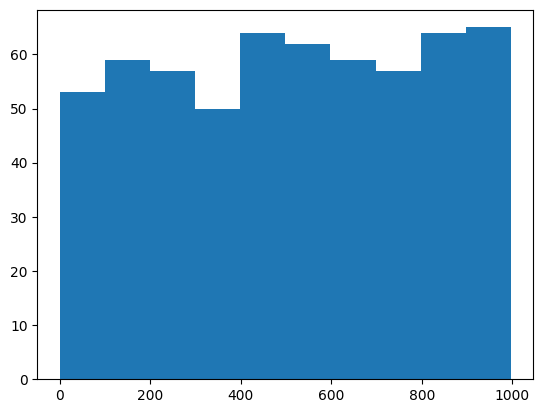

In [72]:
import matplotlib.pyplot as plt
plt.hist(sample)

In [ ]:
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print('\t', corpus_sentences[sentence_id])
    print('\t', '...')

    for sentence_id in cluster[-3:]:
        print('\t', corpus_sentences[sentence_id])

In [19]:
import numpy as np
x = np.random.randn(100,2) # 100 samples in 2d array from standard distribution
len(corpus_embeddings)

78193

In [6]:
# Agglomerative Clustering
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm
import numpy as np

#embedder = SentenceTransformer('all-MiniLM-L6-v2')
#corpus_sentences = list(set(dataset.claim))
#corpus_embeddings = embedder.encode(corpus_sentences)

# Normalize the embeddings to unit length
#***corpus_embeddings = corpus_embeddings / np.linalg.norm(corpus_embeddings, axis = 1, keepdims = True)

# Perform agglomerative clustering
clustering_model = AgglomerativeClustering(n_clusters = 6, compute_full_tree = True)
clustering_model.fit(corpus_embeddings[:20000]) # 10000개: 약 17초.. 
clustering_model.labels_

#pbar = tqdm(range(len(corpus_embeddings[:1000]+1)))
#for i in pbar:
#    clustering_model.fit(corpus_embeddings)
#    pbar.update(1)


array([0, 2, 4, ..., 2, 4, 1])

In [20]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset = 'all', remove=('headers', 'footers', 'quotes'))['data']
# type: a list of strings

In [24]:
from bertopic import BERTopic
topic_model = BERTopic(language = 'korean', calculate_probabilities= False)
topics = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [25]:
# extracting topics
freq = topic_model.get_topic_info(); freq.head(5)

Topic  Count                           Name
0     -1   6294                -1_to_of_the_is
1      0   1767           0_game_team_he_games
2      1   1581               1_car_bike_my_it
3      2    663      2_space_nasa_launch_earth
4      3    547  3_key_clipper_chip_encryption

In [29]:
topic_model.get_topic(0)

[('game', 0.0123009984327302),
 ('team', 0.010449415465138332),
 ('he', 0.009471727782153367),
 ('games', 0.007863814235978133),
 ('hockey', 0.0070953153111798836),
 ('year', 0.0070067765531576925),
 ('players', 0.006864361404295316),
 ('season', 0.006845128302971413),
 ('play', 0.006703675844808441),
 ('25', 0.006143336712962552)]

In [32]:
topic_model.topic_sizes_

{-1: 6294,
 0: 1767,
 1: 1581,
 2: 663,
 3: 547,
 4: 528,
 5: 454,
 6: 370,
 7: 284,
 8: 210,
 9: 187,
 10: 165,
 11: 160,
 12: 151,
 13: 147,
 14: 129,
 15: 124,
 16: 122,
 17: 104,
 18: 98,
 19: 98,
 20: 97,
 21: 91,
 22: 88,
 23: 85,
 24: 81,
 25: 80,
 26: 79,
 27: 77,
 28: 76,
 29: 74,
 31: 73,
 30: 73,
 32: 72,
 33: 71,
 34: 71,
 35: 70,
 36: 70,
 37: 69,
 38: 65,
 39: 64,
 40: 63,
 41: 62,
 42: 61,
 43: 61,
 44: 59,
 45: 57,
 46: 57,
 47: 56,
 48: 56,
 49: 52,
 50: 50,
 51: 49,
 52: 48,
 53: 44,
 54: 43,
 55: 42,
 56: 42,
 57: 42,
 58: 42,
 59: 40,
 61: 39,
 60: 39,
 62: 38,
 63: 38,
 64: 37,
 65: 36,
 66: 36,
 67: 36,
 68: 35,
 69: 35,
 70: 35,
 71: 33,
 72: 32,
 73: 32,
 74: 31,
 75: 31,
 76: 31,
 77: 31,
 78: 30,
 83: 29,
 82: 29,
 80: 29,
 81: 29,
 79: 29,
 84: 28,
 85: 28,
 86: 28,
 87: 26,
 88: 25,
 89: 25,
 90: 24,
 91: 24,
 92: 24,
 93: 24,
 94: 23,
 95: 23,
 96: 23,
 99: 22,
 100: 22,
 98: 22,
 97: 22,
 101: 21,
 102: 21,
 103: 21,
 104: 20,
 105: 20,
 106: 20,
 107: 20,

In [33]:
topic_model.visualize_topics()

/Users/chloe/opt/miniconda3/envs/MLDL/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 324 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'game | team | he | games | hockey', 1767],
                                   [1, 'car | bike | my | it | cars', 1581],
                                   [2, 'space | nasa | launch | earth | orbit', 663],
                                   ...,
                                   [158, 'atmosphere | dioxide | co2 | carbon | tons', 11],
                                   [159, 'bible | translations | rev | editions | _eh_', 10],
                                   [160, 'fbi | batf | doj | blame | apologist', 10]], dtype=object),
              'hovertemplate': ('<b>Topic %{customdata[0]}</b><' ... '[1]}<br>Size: %{customdata[2]}'),
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([1767, 1581,  663,  547,  528,  454,  370,  284,  210,  187,  165,  160,
                                         151,  147,  129,  124,  122,  104,   98,   98,   97,   91,   88,   85,
                                          81,   80,   79,   77,   76,   74,   73,   73,   72,   71,   71,   70,
                                          70,   69,   65,   64,   63,   62,   61,   61,   59,   57,   57,   56,
                                          56,   52,   50,   49,   48,   44,   43,   42,   42,   42,   42,   40,
                                          39,   39,   38,   38,   37,   36,   36,   36,   35,   35,   35,   33,
                                          32,   32,   31,   31,   31,   31,   30,   29,   29,   29,   29,   29,
                                          28,   28,   28,   26,   25,   25,   24,   24,   24,   24,   23,   23,
                                          23,   22,   22,   22,   22,   21,   21,   21,   20,   20,   20,   20,
                                          19,   19,   19,   19,   19,   18,   18,   17,   17,   16,   16,   16,
                                          16,   16,   15,   15,   15,   15,   15,   15,   15,   15,   15,   14,
                                          14,   14,   14,   14,   14,   14,   14,   14,   13,   13,   13,   13,
                                          13,   13,   13,   13,   12,   12,   12,   12,   11,   11,   11,   11,
                                          11,   11,   11,   10,   10]),
                         'sizemode': 'area',
                         'sizeref': 1.104375,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 2.9474938 ,  2.9578702 ,  3.2413545 , 11.238438  , 12.10789   ,
                          10.698482  , 12.527494  ,  4.180553  ,  4.236912  ,  3.0138311 ,
                          12.316481  , 12.441982  , -1.0639402 , 11.96415   , -1.1567558 ,
                          -0.8185019 ,  0.2809397 , 12.780365  , 12.7118635 , 12.598785  ,
                          -1.6376903 , -1.4799001 , -0.7319752 , 12.7748375 ,  7.1859226 ,
                           0.21772765, 12.588439  ,  2.1364243 , -0.9850638 , 11.433226  ,
                           3.2680662 ,  3.9717896 , -1.3434573 , -1.1383442 ,  5.989094  ,
                                  nan,  7.819063  , 12.1962595 , 12.20649   ,  6.9554076 ,
                           7.83515   ,  5.9403152 , 12.25479   ,  8.006047  , -1.5203336 ,
                           0.01645139, 13.417294  , -1.0259017 , 13.168223  , 13.064808  ,
                          -0.94978505, -0.74442935,  2.8883202 , 12.618109  ,  7.397068  ,
                          -0.42876518, -1.3458941 ,  3.5241675 ,  2.0141973 ,  3.8246405 ,
                          -7.17462   , 11.7650175 , 11.547372  , -0.4284078 , 13.031937  ,
                           7.611202  , -1.6193829 , -1.7706686 , 12.758157  ,  3.6116624 ,
                          12.107871  ,  2.9869082 , -1.7880692

In [34]:
topic_model.visualize_hierarchy(top_n_topics = 50)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.57714313, 0.57714313, 0.        ]),
              'xaxis': 'x',
              'y': array([-15., -15., -25., -25.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.64150884, 0.64150884, 0.57714313]),
              'xaxis': 'x',
              'y': array([ -5.,  -5., -20., -20.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.59924672, 0.59924672, 0.        ]),
              'xaxis': 'x',
              'y': array([-35., -35., -45., -45.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.79700699, 0.79700699, 0.        ]),
              'xaxis': 'x',
              'y': array([-75., -75., -85., -85.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.87592835, 0.87592835, 0.79700699]),
              'xaxis': 'x',
              'y': array([-65., -65., -80., -80.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.94061066, 0.94061066, 0.87592835]),
              'xaxis': 'x',
              'y': array([-55. , -55. , -72.5, -72.5]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(133,20,75)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.93134566, 0.93134566, 0.        ]),
              'xaxis': 'x',
              'y': array([ -95.,  -95., -105., -105.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.94061066, 1.12550694, 1.12550694, 0.93134566]),
              'xaxis': 'x',
              'y': array([ -63.75,  -63.75, -100.  , -100.  ]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.59924672, 1.26560193, 1.26560193, 1.12550694]),
              'xaxis': 'x',
              'y': array([-40.   , -40.   , -81.875, -81.875]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 1.08016479, 1.08016479, 0.        ]),
              'xaxis': 'x',
              'y': array([-115., -115., -125., -125.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([1.26560193, 1.40910383, 1.40910383, 1.08016479]),
              'xaxis': 'x',
              'y': array([ -60.9375,  -60.9375, -120.    , -120.    ]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.64150884, 1.56625253, 1.56625253, 1.4091038

In [35]:
topic_model.visualize_barchart(top_n_topics = 5)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.0070953153111798836, 0.007863814235978133,
                    0.009471727782153367, 0.010449415465138332, 0.0123009984327302],
              'xaxis': 'x',
              'y': [hockey  , games  , he  , team  , game  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.007101032674473817, 0.007112486120730206,
                    0.007616028226135949, 0.01008840239196025,
                    0.015320069357894294],
              'xaxis': 'x2',
              'y': [cars  , it  , my  , bike  , car  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.008094852562898292, 0.00845906083511007,
                    0.009327075506664463, 0.009843095133447242,
                    0.01962595964641405],
              'xaxis': 'x3',
              'y': [orbit  , earth  , launch  , nasa  , space  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.01141847080729814, 0.013507700230069506,
                    0.014033806375519672, 0.014872093817309796,
                    0.01856736201595358],
              'xaxis': 'x4',
              'y': [keys  , encryption  , chip  , clipper  , key  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.009665533447204968, 0.009746281938834029,
                    0.009900570504158695, 0.014489667436613642,
                    0.016167188797934384],
              'xaxis': 'x5',
              'y': [x11  , widget  , motif  , dos  , window  ],
              'yaxis': 'y5'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 1',
                                'x': 0.36250000000000004,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 2',
                                'x': 0.6375000000000001,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 3',
                                'x': 0.9125,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 4',
                            

In [36]:
topic_model.visualize_heatmap(n_clusters = 20, width = 1000, height = 1000)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_game_team_he, 14_cubs_suck_kk, 16_fire_fbi_gas,
                    21_tsk_bolick_joke, 74_uv_light_blue, 76_weaver_cooper_trial,
                    77_kirlian_photography_leaf, 125_water_mwra_dept,
                    132_deleted_stuff_impertinent, 151_transmutations_biologic...,
                    153_sassafras_bark_pepke, 1_car_bike_my, 24_duo_sell_price,
                    25_batf_warrant_fbi, 30_phigs_south_rockefeller,
                    32_science_theory_scientific, 36_games_game_sega,
                    56_book_books_anania, 81_bus_dma_ide,
                    95_copy_protection_software, 103_hb_sb_committee,
                    118_cdrom_comp_vote, 120_government_clinton_clip...,
                    136_corn_playback_ma, 139_test_gre_explanations,
                    140_coupons_yo_prizes, 154_mailing_list_mail,
                    157_rosicrucians_rosicrucia..., 160_fbi_batf_doj,
                    2_space_nasa_launch, 3_key_clipper_chip, 23_cx_c__s6,
                    37_mhz_clock_cpu, 38_board_chip_pins, 39_tickets_ticket_room,
                    42_motherboard_board_slots, 46_points_sphere_xxxx,
                    53_number_phone_dial, 68_ax_max_g9v, 96_cpu_fan_heat,
                    110_dialing_tone_phone, 123_ground_conductor_ground...,
                    130_anonymous_privacy_inter..., 131_gateway_66v_machine,
                    133_irq_irq2_irq7, 134_solder_boards_silver,
                    144_date_clock_dos, 4_window_dos_motif, 18_scsi_ide_drive,
                    26_dos_windows_allocation, 40_00_dos_mpc, 49_gif_format_files,
                    64_simms_simm_dram, 70_image_edu_graphics,
                    80_windows_ini_helpfiles, 97_zip_win3_cica,
                    107_graeme_incremental_rokne, 115_00_working_unknown,
                    124_ms_innovative_unix, 127_cdtv_drive_d3, 129_pds_nubus_lc,
                    138_hijaak_shareware_pov, 141_tiff_complexity_spec,
                    5_critus_ites_cheek, 27_clinton_limbaugh_his,
                    44_colorado_ted_locutus, 45_koresh_batf_fbi,
                    54_edu_umcc_article, 72_he_him_liar,
                    73_president_myers_stephano..., 83_jim_context_articles,
                    92_00_50_1st, 98_koresh_cult_authorities,
                    105_stephanopoulos_mr_presi..., 117_pgp_uk_whitaker,
                    147_nra_hci_escrow, 148_shafer_dryden_insisting,
                    150_geico_radar_insurance, 6_sound_amp_audio,
                    10_card_drivers_diamond, 11_monitor_screen_monitors,
                    29_font_fonts_truetype, 48_3d_3do_grafsys, 63_msg_food_chinese,
                    78_radar_detector_detectors, 82_lens_camera_package,
                    99_hacker_hackers_computer, 112_eye_chromaticity_vision,
                    113_scanner_logitech_dpi, 156_ghostscript_ghostview_p...,
                    7_israel_israeli_arab, 22_islam_islamic_rushdie,
                    31_jews_jewish_zionism, 69_muslims_serbs_bosnian,
                    84_marriage_married_marry, 8_armenian_armenians_were,
                    52_government_libertarians_..., 58_amendment_constitution_r...,
                    104_russia_world_stalin, 143_militia_regulated_right,
                    149_objective_morality_values, 9_gun_guns_crime,
                    101_nuclear_weapons_weapon, 12_gay_homosexual_sex,
                    47_homosexuality_homosexual..., 57_tax_income_benefactor,
                    65_dog_dogs_bike, 89_kuwait_iran_iraq,
                    155_abortion_abortions_choice, 13_printer_print_deskjet,
                    17_drive_disk_drives, 34_port_ports_modem, 41_modem_fax_modems,
                    61_mouse_driver_windows, 62_keyboard_keycode_key,
                    122_backup_ta

In [44]:
import pandas as pd
dataset_path = os.path.join(os.getcwd(), 'df_filtered.csv') 
print(dataset_path)
dataset = pd.read_csv(dataset_path, encoding = 'utf-8', engine = 'python')
dataset.index = dataset.iloc[:,0]
dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset = dataset.rename_axis('')

/Users/chloe/SNU/Factcheck/factcheck-ko-2021/df_filtered.csv


In [57]:
dataset[dataset.True_False=='None'].count()

True_False    16489
claim         16489
title1        13457
title2         9601
title3         3649
title4         1170
dtype: int64

In [78]:
!pip install bs4
!pip install konlpy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [77]:
import pandas as pd
from bs4 import BeautifulSoup
import re, nltk, konlpy
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #텐서플로우 v2에서도 실행 가능하게 하기
tf.random.set_seed(777) # 하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import os
import random

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
class load_files:
  def __init__(self, path, shuffle):
    self._labels = ['정치', '경제', '사회', '생활/문화', '세계', '기술/IT', '연예', '스포츠'] 
    self.data = []
    self.target = []
    for i in range(len(self._labels)):
      for k in range(200):
        k = str(k)
        if len(k) == 1:
          file_name = str(i)+'00'+k+'NewsData.txt'
        elif len(k) == 2:
          file_name = str(i)+'0'+k+'NewsData.txt'
        else:
          file_name = str(i)+k+'NewsData.txt'

        with open(os.path.join(path,f'{i}/{file_name}'), 'r') as file:
          content = file.read()
          self.data.append(content)
          self.target.append(i)
    
    if shuffle == True:
      self._zipped_lists = list(zip(self.data, self.target))
      random.shuffle(self._zipped_lists)
      self.data, self.target = zip(*self._zipped_lists)
      self.data = list(self.data)
      self.target = list(self.target)    

In [21]:
import json
import os

# load test data for claims
with open('./data/wiki_claims.json', 'r') as f:
    claim_data = json.load(f)
with open('./data/train_val_test_ids.json', 'r') as f:
    ids = json.load(f)
    test_ids = ids['test_ids'] #list


claims = []
labels = []
for k, i in enumerate(test_ids):
    if i == '6032':
        pass
    else:
        claims.append(claim_data[test_ids[k]]['claim'])
        labels.append(claim_data[test_ids[k]]['True_False'])

# input the claim in the model and get the prediction

# check if the prediction is correct

# save the result

In [33]:
labels.count('True')

1666

In [15]:
claim_data['40488']
#test_ids

{'user_id': 20,
 'evidence1': '대대로 군인으로 출세한 프로이센 귀족 집안에서 태어난 만슈타인은 젊어서부터 육군에 입대하여 제1차 세계 대전(1914년 ~ 1918년) 당시 여러 전선에서 복무했다.',
 'evidence2': '1차대전 당시 만슈타인은 서부전선과 동부전선에서 모두 복무했다.',
 'evidence3': None,
 'evidence4': None,
 'evidence5': None,
 'True_False': 'True',
 'Date': '2021-10-01 07:05:55.454316',
 'claim': '에리히 폰 만슈타인은 제1차 세계 대전 당시 서부전선과 동부전선에서 복무했다.',
 'title1': '에리히 폰 만슈타인',
 'title2': '에리히 폰 만슈타인',
 'title3': None,
 'title4': None,
 'title5': None,
 'count_variation': 0,
 'is_variation': 1,
 'original_claim_id': 23106,
 'reference_id': 0,
 'more_than_two': 1,
 'mark': 0}

In [2]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--sum', default = '나는 인문대 신양에서 커피를 마시고 있다.', type = str, help = 'none')

args = parser.parse_args()


usage: ipykernel_launcher.py [-h] [--sum SUM]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/chloe/Library/Jupyter/runtime/kernel-bed51570-b687-4653-b76d-adf5f87659c9.json


SystemExit: 2

In [37]:
args.claim

AttributeError: 'function' object has no attribute 'claim'

In [3]:
tbl = {}
tbl['claim'] = 'dfdf'

In [4]:
tbl

{'claim': 'dfdf'}

In [7]:
tbl['1111'] = {'claim': str, 'True_False' : str, 'is_correct': 0}

In [8]:
tbl

{'claim': 'dfdf', '1111': {'claim': str, 'True_False': str, 'is_correct': 0}}

In [10]:
import json
# load test data for claims
with open('./data/wiki_claims.json', 'r') as f:
    claim_data = json.load(f)
with open('./data/train_val_test_ids.json', 'r') as f:
    ids = json.load(f)
    test_ids = ids['test_ids'] #list


# make a test_tbl dict to prepare the dataset

claims = []
labels = []
test_tbl = dict()
for k, i in enumerate(test_ids):
    if i == '6032':
        pass
    else:
        test_tbl[i] = {'claim': claim_data[test_ids[k]]['claim'],
        'True_False' : claim_data[test_ids[k]]['True_False'], 'is_correct': -1}


In [14]:
list(test_tbl.keys())[0]

'40488'

In [24]:

claims = []
labels = []
test_tbl = dict()
for k, i in enumerate(test_ids):
    if i == '6032':
        pass
    else:
        test_tbl[i] = {'claim': claim_data[test_ids[k]]['claim'],
        'True_False' : claim_data[test_ids[k]]['True_False'], 'is_correct': -1, 'rte_score': -1.0}


In [16]:
test_tbl[i]

{'claim': '카리브해의 가장 깨끗한 섬 국가들은 열대성 기후를 가지고 있고 건기와 우기로 나뉜다.',
 'True_False': 'None',
 'is_correct': -1,
 'rte_score': -1.0}

In [26]:
a = '6.25 전쟁 당시의 미국 제8군의 전투 서열, 윈도우 폰, 연합국 (제1차 세계 대전), 제3차 하리코프 공방전, 세계 대전, 에리히, 폰, 당시, 독일 국방군, 스마트폰, 한스울리히 루델, 서부 전선 이상 없다, 선셋 대로 (영화), 세계, 서부전선 포격 사건, 동부 전선 (제2차 세계 대전), 서부 전선 (제2차 세계 대전), 제1차 사토 내각 (제1차 개조), 발터 외자우, 동부 전선, 에리히 프롬, 게르하르트 바르크호른, 제2차 세계 대전, 병역, 서부 전선 (제1차 세계 대전), 대체복무제, 대전 하나 시티즌, 에리히 폰 만슈타인, 전당시, 동부 전선 (제1차 세계 대전), 대전광역시, 제1차 세계 대전, 세바스토폴 포위전 (1941년~1942년), 하인츠 구데리안, 1887년, 에리히 폰 팔켄하인, 세계유산, 사회복무요원, 제1차 인도차이나 전쟁, 에리히 호네커, 서부 전선'
k = a.split(',')
print(len(k))

41


In [23]:
test_tbl[i]

{'claim': '카리브해의 가장 깨끗한 섬 국가들은 열대성 기후를 가지고 있고 건기와 우기로 나뉜다.',
 'True_False': 'None',
 'is_correct': -1,
 'rte_score': -1.0}

In [1]:
import pickle

In [3]:
import os
os.getcwd()

'/Users/chloe/SNU/Factcheck/factcheck-ko-2021'

In [6]:
with open('./ss/tmp/test_data.pickle', 'rb')as f:
    a = pickle.load(f)

In [6]:
import threading, logging

In [ ]:
def get_logger():
    logger = logging.getLogger('Thread Example')
    logger.setLevel(logging.DEBUG)
    fh = logging.StreamHandler()
    fmt = '%(asctime)s - %(threadName)s - %(levelname)s - %(message)s'
    formatter = logging.Formatter(fmt)
    fh.setFormatter(formatter)
    logger.addHandler(fh)
    
    return logger


def execute(number, logger):
    logger.debug('execute function on progress')
    result = number * 2
    logger.debug(f'execution function ended with: {result}')
    print(threading.currentThread().getName(), number)


if __name__ == '__main__':
    logger = get_logger()
    for i, name in enumerate(['Chloe', 'Lukas', 'Alex', 'Alain', 'Imme']):
        my_thread = threading.Thread(target = execute, name = name, args = (i,logger))
        my_thread.start()

2023-02-13 21:33:16,143 - Chloe - DEBUG - execute function on progress
2023-02-13 21:33:16,146 - Lukas - DEBUG - execute function on progress
2023-02-13 21:33:16,146 - Alex - DEBUG - execute function on progress
2023-02-13 21:33:16,147 - Chloe - DEBUG - execution function ended with: 0
2023-02-13 21:33:16,147 - Alain - DEBUG - execute function on progress
2023-02-13 21:33:16,148 - Imme - DEBUG - execute function on progress
2023-02-13 21:33:16,149 - Lukas - DEBUG - execution function ended with: 2
2023-02-13 21:33:16,150 - Alex - DEBUG - execution function ended with: 4
2023-02-13 21:33:16,151 - Alain - DEBUG - execution function ended with: 6
2023-02-13 21:33:16,152 - Imme - DEBUG - execution function ended with: 8


Chloe 0
Lukas 1
Alex 2
Alain 3
Imme 4
